# Plasticity of cancer cell invasion - Project status 

Experimental observations:
1. WT cells are **slow and correlated**
2. KD cells are **fast and uncorrelated**
3. Confinement by ECM reduces speed in both cases
4. WT cells are **more correlated** under confinement

Problem: In current model, cells are **always uncorrelated**, cell-cell adhesion only prevents cell detachment from cluster.

In [33]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/home/simon/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


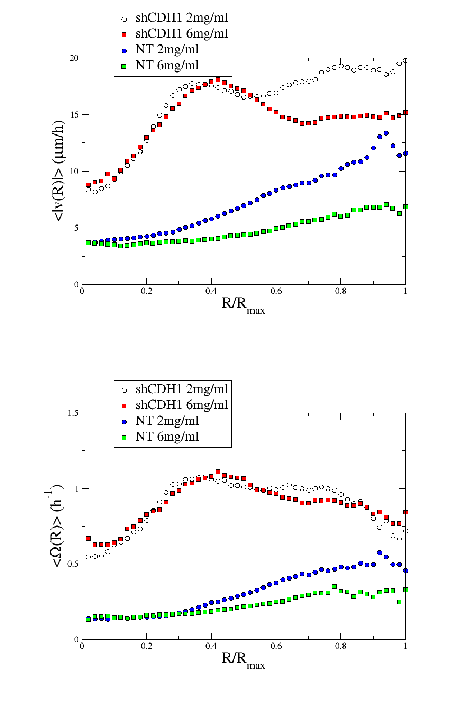

In [34]:
vprofile = mpimg.imread('Velocity-profile-tot-norm.png')
vortprofile = mpimg.imread('Vort-profile_tot-normalized.png')

plt.figure(figsize=(9, 10), tight_layout=True, frameon=False)
plt.subplot(211)
plt.axis('off')
i1 = plt.imshow(vprofile)
plt.subplot(212)
plt.axis('off')
i2 = plt.imshow(vortprofile)

In [35]:
ndividualized_cellspath = '/mnt/data/simon/friedl_paper_raw_data/friedl_project/final/'
ecm_densities = np.load(path + 'densities.npy')
betas = np.load(path + 'betas.npy')
vorticity = np.load(path + 'mean_vorticity.npy')
corrected_vorticity = np.load(path + 'corrected_vorticity.npy')
mov_frac = np.load(path + 'mov_frac.npy')
speed = np.load(path + 'mean_speed.npy')
speed_uni = np.load(path + 'mean_speed_const_window.npy')
speed_gauss = np.load(path + 'mean_speed_gauss_window.npy')
correlations = np.load(path + 'mean_corr.npy')


FileNotFoundError: [Errno 2] No such file or directory: 'raw_configs/large_param_scan/densities.npy'

In [ ]:
X, Y = np.meshgrid(ecm_densities, betas, indexing='ij')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, mov_frac, cmap='viridis')
plt.title('Moving fraction = average speed')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')

Speed behaves already correctly in the model and is proportional to the diffusion constant (not shown, see manuscript). However, average speed can be defined in different ways:
1. Above, I show the average fraction of cells in velocity channels. As every cell in a velocity channels performs a jump with speed 1, this fraction is proportional to the "microscopic" speed.
- Similarly, it is possible to use the LGCA definition of the flux $$\vec{J} = \sum_i \vec{c_i} \eta_i.$$ From $\vec{J} = \rho \vec{v}$  and $\rho = \sum_i \eta_i$, we can also define a speed $$\vec{v} = \frac{\vec{J}}{\rho}$$ for $\rho > 0$ (otherwise $\vec{v} = 0$ by definition).
The second definition gives a qualitatively similar result, but the influence of strong adhesion on the speed is more pronounced, see below.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, speed, cmap='viridis')
plt.title('Average speed obtained from flux/density')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')
plt.show()

One idea to identify correlations in the system was to look at time-averaged quantities, especially speeds. To obtain the time average we can use different rolling windows. In particular I tested a uniform window of length 5 and a Gaussian window of variance 5. Basis for time averaging was the the speed obtained from the flux (definition 2). However, as I only want to "measure" the speed at nodes with non-zero density, it becomes quite difficult to define a proper averaging scheme.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, speed_uni, cmap='viridis')
plt.title('Uniformly time-averaged speed obtained from flux/density')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, speed_gauss, cmap='viridis')
plt.title('Gaussian time-averaged speed obtained from flux/density')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')
plt.show()

## Neighbor correlations
We define velocity correlation $c_v$ as 
$$ c_v (r) = \frac{\vec{v}(r) \cdot \sum_i  \vec{v} (r + c_i) }{|v(r)| |\sum_i  \vec{v} (r + c_i)|} $$.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, correlations, cmap='viridis')
plt.title('Correlations')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Correlations')
plt.show()

## Vorticity
The vorticity of a continuous flow field is defined as $$\vec{\Omega} = \vec{\nabla} \times \vec{v}.$$ For a two-dimensional flow field it only has a $z$-component, that is given by 
$$\Omega_z = \partial_x v_y - \partial_y v_x.$$
The partial derivatives can be approximated on the lattice as
$$\partial_i v_j (\vec{r}) \propto \left( \sum_k \vec{c}_k v_j (\vec{r} + \vec{c}_k) \right)_i = \sum_k c_{k,i} v_j (\vec{r} + \vec{c}_k).$$
For the vorticity we end up with
$$\Omega \propto \sum_i c_{i,x} v_y(\vec{r}+\vec{c_i}) - c_{i,y} v_x(\vec{r} + \vec{c_i})$$

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, vorticity, cmap='viridis')
plt.title('Vorticity')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Vorticity')
plt.show()

Problem: Vorticity proportional to velocity. If we normalize the flow field, to only say anything about correlations, we obtain the following plot -> similar to correlation plot, as expected. 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, corrected_vorticity, cmap='viridis')
plt.title('Corrected vorticity')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Vorticity')
plt.show()

# Discussion
**Problem: Vorticity and correlations do not depend on adhesion strength!**
This is not surprising, because there is no alignment mechanism in the model. Consequently, single cells as well as cells in the bulk perform a random walk (with different diffusion constants). However, simply adding alignment extremely increases the speed for high sensitivity values $\to$ we need to combine alignment with adhesion in a reasonable way.
Problem:
- We then have 2 parameters (alignment and adhesion sensitivity), that both describe an effect of adhesion, but in the experiment there is only 1 parameter.
- We can make one parameter depend on the other (or make them equal), but this is a rather arbitrary choice and the dynamics is very sensitive to it.

I tried to design such an interaction anyway, see simulations below. The transition probability reads
$$ P(\eta\to \eta\prime) = \frac{1}{Z} \exp \left\{ \beta  \left( \frac{1}{2b} \vec{J}\cdot \vec{J}^\mathcal{N} + \frac{2}{b\rho_0} n_r^\mathcal{N} n_r \left(1 - \frac{n_r}{2\rho_0}\right)^+ +\frac{1}{n_0} \vec{J}\cdot \vec{G} \right) \right\},$$ 
where $\rho_0 := \frac{n_0 + 1}{b+1}$ is the critical node density defined with the critical number of neighbors for adhesion $n_0$.

# Steady state from homogeneous initial state

In [8]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [13]:
l = 50
restc = 3
nodes = np.zeros((l, l, restc+6))
dens = 1. / (restc + 6)
l_spheroid = 2
ecmdens = 0
nodes[..., :l_spheroid, -3:] = 1
#nodes[10, 10, 1] = 1
lgca = get_lgca(geometry='hex', interaction='wetting', beta=10., alpha=0, gamma=10, bc='rbc', density=0, restchannels=restc,
                rho_0=3, nodes=nodes)
lgca.r_b = .05
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+l_spheroid] = 1
lgca.ecm = (np.random.random(lgca.cell_density.shape) < ecmdens) & np.invert(lgca.spheroid)
#lgca.timeevo(500, record=True)
#lgca.timestep()

<IPython.core.display.Javascript object>


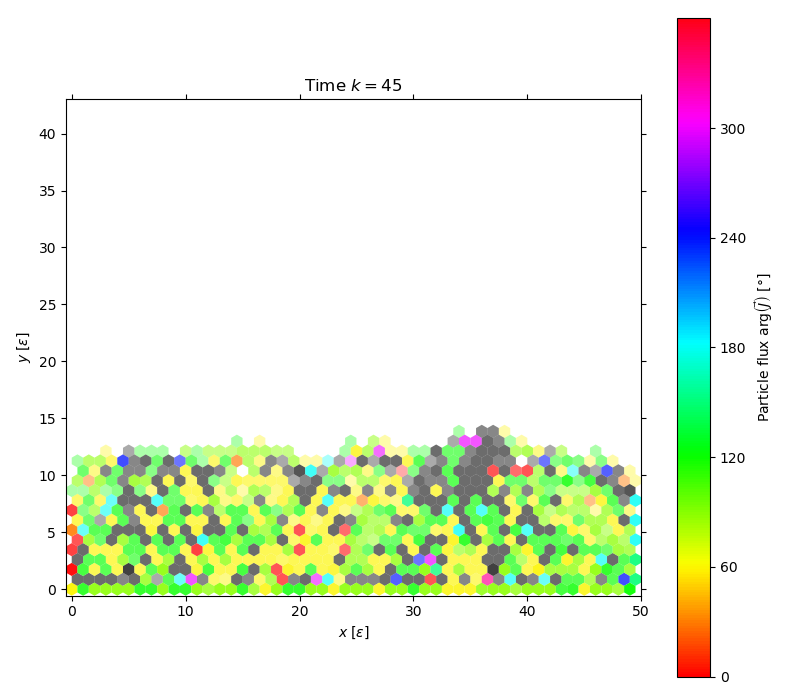

In [14]:
%matplotlib notebook
#ani = lgca.animate_flux()
#ani.save('Ecad_lo.avi')
#lgca.plot_density(lgca.ecm[lgca.nonborder], cmap='Greys', vmax=1, figindex=0, cbar=False)
#lgca.plot_density()
#lgca.plot_flux(figindex=0)
#plt.title('Uncorrelated sheet')
#plt.savefig('uncorrelated_sheet.pdf', dpi=600)
lgca.live_animate_flux()
#lgca.live_animate_density()

In [ ]:

n_adh = lgca.nodes.sum()
print(n_noadh, n_adh)

In [ ]:
lgca.live_animate_density()

In [ ]:
print(lgca.nodes.sum())

# "Wound healing" simulation
## WT cells

In [ ]:
l = 50
restc = 6
mean_dens = 0.5 / (restc + 6)
nodes = np.zeros((l, l, restc+6))
nodes[..., :6, -3:] = 1
lgca = get_lgca(interaction='wetting', beta=0, alpha=0, gamma=2, bc='refl', density=0, restchannels=restc, nodes=nodes)
lgca.n_crit = 20
lgca.r_b = 1
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, 0:lgca.r_int+6] = 1vorts

In [ ]:
#lgca.timeevo(150, record=True)
#lgca.timestep()
lgca.live_animate_flux()
#lgca.live_animate_density()
#lgca.plot_density()

In [ ]:
ani = lgca.live_animate_flux()

In [ ]:
#ani.save('WT_cells.mp4')

In [ ]:
print(lgca.nodes.sum()/ lgca.lx / lgca.ly / lgca.K) 
print(3 / lgca.K)

In [ ]:
record = np.moveaxis(lgca.nodes_t, 0, 2)
dens = record.sum(-1)
flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)
mean_v = np.mean(speed[dens>0])
#v = flux
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>0, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>0, out=np.zeros_like(corr))
corr = np.mean(corr[speed>0])
mean_speed = lgca.nodes_t[..., :lgca.velocitychannels].sum() / lgca.nodes_t.sum()

In [ ]:
print('Correlations =', corr)
print('Mean moving fraction =', mean_speed)
print('Speed =', mean_v)

## KD cells (no adhesion)

In [ ]:
lgca = get_lgca(interaction='wetting', beta=0, alpha=5, gamma=0, bc='pbc', density=mean_dens, restchannels=restc, nodes=nodes)
lgca.n_crit = 20

In [ ]:
lgca.timeevo(record=True)

In [ ]:
record = np.moveaxis(lgca.nodes_t, 0, 2)
dens = record.sum(-1)
flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)
mean_v = np.mean(speed[dens>0])
#v = flux
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>0, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>0, out=np.zeros_like(corr))
corr = np.mean(corr[speed>0])
mean_speed = lgca.nodes_t[..., :lgca.velocitychannels].sum() / lgca.nodes_t.sum()

In [ ]:
print('Correlations =', corr)
print('Mean moving fraction =', mean_speed)
print('Speed =', mean_v)

# Full parameter scan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
path = 'raw_configs/large_param_scan/'

betas = np.linspace(9.2, 10, 5)
ecms = np.linspace(0, 1, 51)
N = 5
l = 50
l_spheroid = 2
ecmdens = 0
dims = (l, l)
tmax = 100
restc = 3
rho_0 = 3
nodes = np.zeros((l, l, restc+6), dtype=bool)
nodes[..., :l_spheroid, -rho_0:] = 1
nodes_nt = np.empty((N, tmax, dims[0], dims[1], 6+restc), dtype=bool)

lgca = get_lgca(geometry='hex', interaction='wetting', beta=10., alpha=0, gamma=10, bc='rbc', density=0, restchannels=restc,
                nodes=nodes, rho_0=rho_0)
lgca.r_b = .05
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+l_spheroid] = 1
lgca.ecm = (np.random.random(lgca.spheroid.shape) < ecmdens) & np.invert(lgca.spheroid)
#np.savez(path + 'parameters.npz', betas=betas, ecms=ecms, runs=N, l=l, tmax=tmax, restc=restc, l_spheroid=1, spheroid=lgca.spheroid,
#         r_b=lgca.r_b, gamma=lgca.gamma)

In [4]:
i = 0
for beta in betas:
    lgca.beta = beta
    j = 0
    for ecmdens in ecms:
        for k in range(N):
            lgca.init_nodes(nodes=nodes)
            lgca.ecm = (np.random.random(lgca.spheroid.shape) < ecmdens) & np.invert(lgca.spheroid)
            lgca.timeevo(tmax//4, recorddens=False, showprogress=False)
            lgca.timeevo(tmax-1, recorddens=False, record=True, showprogress=False)
            nodes_nt[k] = lgca.nodes_t
        
        j += 1
        np.save(path+'nodes_nt_beta{:.1f}_ecm{:.2f}.npy'.format(beta, ecmdens), nodes_nt)
        
        
    i += 1 